## Linear Regression
In this section we introduce a few tools to do linear regressions. We use the classic Ordinary Least Square (OLS) as well as the Stochastic Gradient Descent (SGD).

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

sns.set_style('whitegrid')
pd.options.display.float_format = '{:,.2f}'.format

### Simple Linear Regression
Start with the simplest 1-dimensional regression. We generate random data around a straight line, and then regress on it:

$$y = \beta_0 + \beta_1 X_1 + \epsilon$$

i.e. we look for the parameters $\beta_0$ and $\beta_1$ to reduce the size of the white noise **residuals** $\epsilon$.

Intercept: 49.4139613810
Slope: 2.0053477076


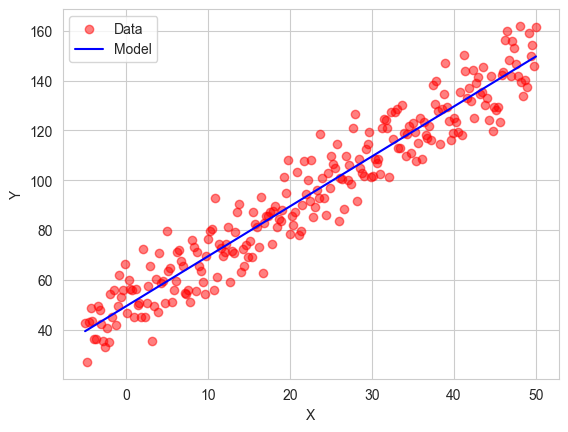

In [ ]:
# Generate points with the true model y = 
n_points = 250
b0 = 50
b1 = 2
x_train = np.linspace(-5, 50, n_points)
stdev = 10
y_train = b0 + b1 * x_train + np.random.normal(0, stdev, size=len(x_train))
data = pd.DataFrame({'X': x_train, 'Y': y_train})

# Add constant for regression
X = sm.add_constant(data['X'])

# Fit with statsmodel
model = sm.OLS(data['Y'], X).fit()
b0_model = model.params[0]
b1_model = model.params[1]
print(f"Intercept: {b0_model:.10f}")
print(f"Slope: {b1_model:.10f}")
# print(model.summary())

# plt.title(name)
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x_train, y_train, color='red', alpha=0.5, label='Data')
x = np.linspace(-5, 50, 100)
y_model = b0_model + b1_model * x
plt.plot(x, y_model, color='blue', alpha=1.0, label='Model')
plt.legend(loc='upper left')
plt.show()


In [ ]:
# Check by using the least-square closed form through matrix inversion

### Add an order to fit polynomials

In [44]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=3)
print(x_train.shape)
print(x_train)
x = x_train.reshape(-1, 2)
print(x.shape)
print(x)
xp = polynomial_features.fit_transform(x_train.reshape(-1, 1))
xp.shape
print(xp)

(10,)
[-5.          1.11111111  7.22222222 13.33333333 19.44444444 25.55555556
 31.66666667 37.77777778 43.88888889 50.        ]
(5, 2)
[[-5.          1.11111111]
 [ 7.22222222 13.33333333]
 [19.44444444 25.55555556]
 [31.66666667 37.77777778]
 [43.88888889 50.        ]]
[[ 1.00000000e+00 -5.00000000e+00  2.50000000e+01 -1.25000000e+02]
 [ 1.00000000e+00  1.11111111e+00  1.23456790e+00  1.37174211e+00]
 [ 1.00000000e+00  7.22222222e+00  5.21604938e+01  3.76714678e+02]
 [ 1.00000000e+00  1.33333333e+01  1.77777778e+02  2.37037037e+03]
 [ 1.00000000e+00  1.94444444e+01  3.78086420e+02  7.35168038e+03]
 [ 1.00000000e+00  2.55555556e+01  6.53086420e+02  1.66899863e+04]
 [ 1.00000000e+00  3.16666667e+01  1.00277778e+03  3.17546296e+04]
 [ 1.00000000e+00  3.77777778e+01  1.42716049e+03  5.39149520e+04]
 [ 1.00000000e+00  4.38888889e+01  1.92623457e+03  8.45402949e+04]
 [ 1.00000000e+00  5.00000000e+01  2.50000000e+03  1.25000000e+05]]


Intercept: 130.8827238893
Slope: -7.9103511910
2nd Order: 3.2275505655


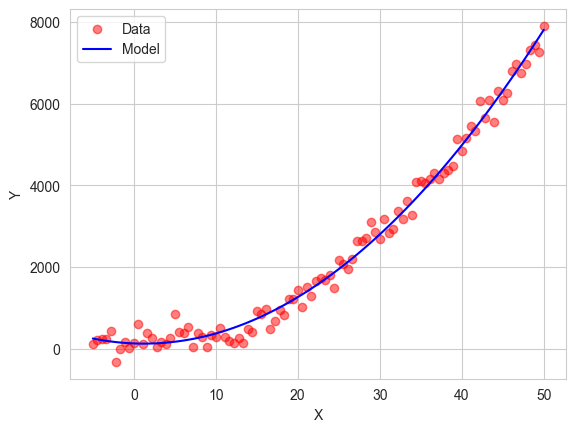

In [61]:
# Generate points with the true model y = 
n_points = 100
b0 = 50
b1 = 2
b2 = 3
x_train = np.linspace(-5, 50, n_points)
x2_train = x_train * x_train
stdev = 250
y_train = b0 + b1 * x_train + b2 * x2_train + np.random.normal(0, stdev, size=len(x_train))

# Add constant for regression
# print(x_train)
# print(x2_train)
data = np.stack((x_train, x2_train), axis=1)
# print(data)
X = sm.add_constant(data)
# print(X)

# Fit with statsmodel
model = sm.OLS(y_train, X).fit()
print(f"Intercept: {model.params[0]:.10f}")
print(f"Slope: {model.params[1]:.10f}")
print(f"2nd Order: {model.params[2]:.10f}")
# print(model.summary())

# plt.title(name)
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x_train, y_train, color='red', alpha=0.5, label='Data')
x = np.linspace(-5, 50, 100)
y_model = model.params[0] + model.params[1] * x + model.params[2] * x**2
plt.plot(x, y_model, color='blue', alpha=1.0, label='Model')
plt.legend(loc='upper left')
plt.show()

### Fit multiple variables